In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statistics import mean
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import umap

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
songs = pd.read_csv("songsWithLyrics.csv")

In [15]:
wordCt = pd.read_json("totalCount.json", typ='series')
wordCt.columns=['word', 'count']
uniqueCt = pd.read_json("totalCountNoDupes.json", typ='series')
uniqueCt.columns=['word', 'count']

In [16]:
wordCt = wordCt.drop(wordCt.index[0])

In [17]:
wordCt.head()

you    211434
i      198497
the    183777
to     119939
and    116479
dtype: object

In [9]:
wordCt.to_csv('wordCt.csv', index=True)

In [10]:
uniqueCt = uniqueCt.drop(uniqueCt.index[0])

In [11]:
wordCt.head()

you    211434
i      198497
the    183777
to     119939
and    116479
dtype: object

In [12]:
wordCt.to_csv('uniqueCt.csv', index=True)

In [18]:
wordCt = pd.read_csv('wordCt.csv')
uniqueCt = pd.read_csv('uniqueCt.csv')

In [22]:
wordCt.columns=['word', 'count']
uniqueCt.columns=['word', 'count']

In [26]:
songs.head()

,Unnamed: 0,WeekID,Week Position,Song,Performer,SongID,Peak Position,Weeks on Chart,lyricLink,lyrics,lyricBool
0,302681,2014-05-10,49,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,3,87,http://www.songlyrics.com/Imagine-Dragons/Radi...,i'm waking up to ash and dust i wipe my brow a...,True
1,302673,2014-03-22,45,Sail,AWOLNATION,SailAWOLNATION,17,79,http://www.songlyrics.com/AWOLNATION/Sail-lyrics,sail this is how i show my love. i made it in ...,True
2,278572,2009-10-10,48,I'm Yours,Jason Mraz,I'm YoursJason Mraz,6,76,http://www.songlyrics.com/Jason-Mraz/I'm-Yours...,well you done done me and you bet i felt it i ...,True
3,278565,1998-10-10,45,How Do I Live,LeAnn Rimes,How Do I LiveLeAnn Rimes,2,69,http://www.songlyrics.com/LeAnn-Rimes/How-Do-I...,how do i get through one night without you if ...,True
4,302643,2012-07-21,49,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock AnthemLMFAO Featuring Lauren Bennet...,1,68,http://www.songlyrics.com/LMFAO-Featuring-Laur...,party rock yeah woo let's go party rock is in ...,True


In [34]:
songs.WeekID = pd.to_datetime(songs.WeekID, errors='ignore', infer_datetime_format=True)

In [36]:
songs['yr'] = [date.year for date in songs.WeekID]

In [38]:
songs_vectors = songs

In [40]:
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(songs_vectors.lyrics)
print("Vector object matrix shape: ", vectors.shape)

Vector object matrix shape:  (20622, 44169)


In [41]:
reduced = umap.UMAP(n_neighbors=30, random_state=42).fit_transform(vectors)

Text(0.5, 1.0, 'Dimension 1 vs Dimension 2 of UMAP Vectors Sorted by Category')

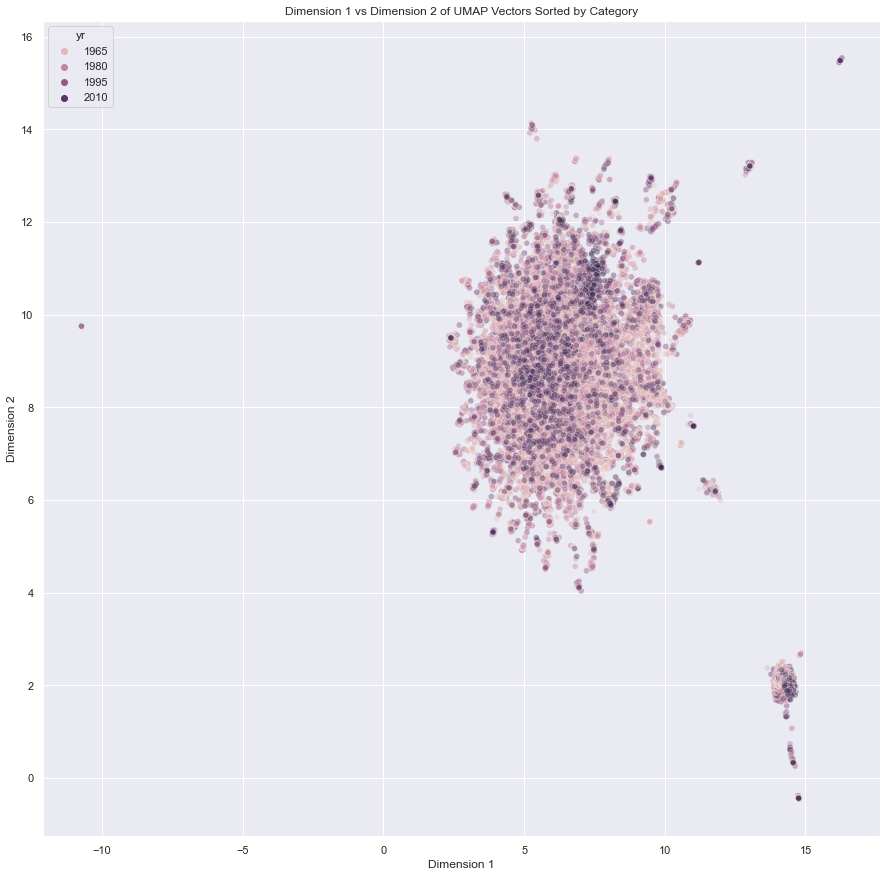

In [43]:
dims = pd.DataFrame.from_records(reduced, columns=['dim1', 'dim2'])

songs_vectors['dim1'] = dims['dim1']
songs_vectors['dim2'] = dims['dim2']

sns.set(rc={"figure.figsize":(15,15)})
sns.scatterplot(data=songs_vectors, x='dim1', y='dim2',  hue='yr', alpha=0.4)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Dimension 1 vs Dimension 2 of UMAP Vectors Sorted by Category")

In [55]:
x_train, x_test, y_train, y_test = train_test_split(songs.lyrics, songs.yr, test_size=0.3, random_state=42)

tfidf_train = TfidfVectorizer()
train_vectors = tfidf_train.fit_transform(x_train)
test_vectors = tfidf_train.transform(x_test)

print("Training vector object matrix shape: ", train_vectors.shape)
print("Training data labels: ", y_train.shape[0])
print("Testing vector object matrix shape: ", test_vectors.shape)
print("Testing data labels: ", y_test.shape[0])

Training vector object matrix shape:  (14435, 36992)
Training data labels:  14435
Testing vector object matrix shape:  (6187, 36992)
Testing data labels:  6187


In [56]:
train_logistic = LogisticRegression().fit(train_vectors, y_train.values)
yrPred = train_logistic.predict(test_vectors)
print(classification_report(y_test.values, yrPred))

              precision    recall  f1-score   support

        1958       0.00      0.00      0.00        51
        1959       0.09      0.10      0.10        96
        1960       0.07      0.14      0.09       107
        1961       0.10      0.22      0.14       120
        1962       0.11      0.13      0.12       138
        1963       0.05      0.04      0.04       135
        1964       0.07      0.09      0.08       155
        1965       0.04      0.11      0.06       132
        1966       0.06      0.14      0.08       152
        1967       0.06      0.18      0.09       142
        1968       0.06      0.08      0.07       136
        1969       0.05      0.13      0.07       124
        1970       0.04      0.05      0.04       102
        1971       0.06      0.04      0.05       129
        1972       0.07      0.06      0.07       136
        1973       0.03      0.02      0.02       113
        1974       0.09      0.06      0.07       121
        1975       0.04    

/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
def split_by_yr(col, year):
    return pd.cut(col, bins=[1950, year, 2022], include_lowest=True, labels=[0, 1])

In [73]:
split_yr = 1985

songs_vectors['splits'] = split_by_yr(songs_vectors.yr, split_yr)
print(songs_vectors['splits'])

x_train, x_test, y_train, y_test = train_test_split(songs_vectors.lyrics, songs_vectors.splits, test_size=0.3, random_state=42)

tfidf_train = TfidfVectorizer()
train_vectors = tfidf_train.fit_transform(x_train)
test_vectors = tfidf_train.transform(x_test)

train_logistic = LogisticRegression().fit(train_vectors, y_train.values)
yrPred = train_logistic.predict(test_vectors)

rain_logistic = LogisticRegression().fit(train_vectors, y_train.values)
yrPred = train_logistic.predict(test_vectors)
print("SPLIT YEAR: ", split_yr)
print(classification_report(y_test.values, yrPred, output_dict=True)['accuracy'])

0        1
1        1
2        1
3        1
4        1
        ..
20617    1
20618    1
20619    1
20620    1
20621    1
Name: splits, Length: 20622, dtype: category
Categories (2, int64): [0 < 1]
SPLIT YEAR:  1985
0.7551317278163892


In [93]:
best_yr = -1
best_acc = 0
accuracies = {}
for i in range(1958, 2022):
    split_yr = i

    songs_vectors['splits'] = split_by_yr(songs_vectors.yr, split_yr)

    x_train, x_test, y_train, y_test = train_test_split(songs_vectors.lyrics, songs_vectors.splits, test_size=0.3, random_state=42)

    tfidf_train = TfidfVectorizer()
    train_vectors = tfidf_train.fit_transform(x_train)
    test_vectors = tfidf_train.transform(x_test)

    train_logistic = LogisticRegression().fit(train_vectors, y_train.values)
    yrPred = train_logistic.predict(test_vectors)

    rain_logistic = LogisticRegression().fit(train_vectors, y_train.values)
    yrPred = train_logistic.predict(test_vectors)
    acc = classification_report(y_test.values, yrPred, output_dict=True)['accuracy']
    accuracies[split_yr] = acc
    
    if (acc > best_acc):
        best_acc = acc
        best_yr = split_yr

print(accuracies)
    

/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukeellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [94]:
print(best_yr)

2020


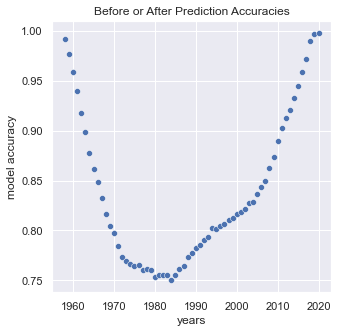

In [109]:
accs = pd.DataFrame.from_dict(accuracies, orient='index')
accs.index.rename('years', inplace=True)

accs.columns = ['accs']
plt.figure(figsize=(5, 5))
accFig = sns.scatterplot(x=accs.index, y=accs.accs)
plt.ylabel("model accuracy")
plt.title("Before or After Prediction Accuracies")
plt.show()

In [100]:
# 1978 to 2001
# Find best year with at least 20 years on both sides
best_year = 1978

for i in range(1978, 2002):
    if accuracies[i] > accuracies[best_year]:
        best_year = i
        
print(best_year)

2001


In [102]:
songs_vectors['splits'] = split_by_yr(songs_vectors.yr, best_year)

x_train, x_test, y_train, y_test = train_test_split(songs_vectors.lyrics, songs_vectors.splits, test_size=0.3, random_state=42)

tfidf_train = TfidfVectorizer()
train_vectors = tfidf_train.fit_transform(x_train)
test_vectors = tfidf_train.transform(x_test)

train_logistic = LogisticRegression().fit(train_vectors, y_train.values)
yrPred = train_logistic.predict(test_vectors)

train_logistic = LogisticRegression().fit(train_vectors, y_train.values)
yrPred = train_logistic.predict(test_vectors)
print(classification_report(y_test.values, yrPred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4593
           1       0.80      0.40      0.53      1594

    accuracy                           0.82      6187
   macro avg       0.81      0.68      0.71      6187
weighted avg       0.82      0.82      0.80      6187

